In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,My Lady Boss,2013
1,Folly of Vanity,1924
2,The Gambler of the West,1915
3,Caleuche: El llamado del Mar,2012
4,Parachute Nurse,1942


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
g = cast[(cast.character == 'Superman') | (c.character == 'Batman')]
g.head()

NameError: name 'c' is not defined

In [6]:
g = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
g.head()

,title,year,name,type,character,n
1026,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0
16014,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,1.0
16040,Justice League,2017,Ben Affleck,actor,Batman,NaN
16056,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN
46454,Atom Man vs. Superman,1950,Kirk Alyn,actor,Superman,1.0


In [7]:
u = g.groupby([g.year,'character']).size()
u.head()

year  character
1938  Batman       1
1940  Batman       1
1943  Batman       1
1948  Superman     1
1949  Batman       2
dtype: int64

In [8]:
v = u.unstack()

In [11]:
v = u.unstack().fillna(0)
v
k = v.superman-v.batman
k

AttributeError: 'DataFrame' object has no attribute 'superman'

In [12]:
v = u.unstack().fillna(0)
v

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0
1950,0.0,1.0
1951,0.0,2.0
1953,2.0,0.0
1954,0.0,5.0


In [13]:
k = v.Superman-v.Batman

In [14]:
k

year
1938   -1.0
1940   -1.0
1943   -1.0
1948    1.0
1949   -2.0
1950    1.0
1951    2.0
1953   -2.0
1954    5.0
1955    1.0
1957   -2.0
1965   -1.0
1966   -1.0
1967   -1.0
1973    1.0
1978    2.0
1980    2.0
1981    0.0
1983    2.0
1985    0.0
1987    1.0
1988   -1.0
1989   -1.0
1991    0.0
1992    0.0
1993   -2.0
1994    0.0
1995    0.0
1997    0.0
1998   -1.0
1999   -1.0
2002    0.0
2003    0.0
2004   -1.0
2005   -1.0
2006    1.0
2008   -1.0
2009   -2.0
2010    0.0
2011   -1.0
2012   -1.0
2013   -3.0
2014   -4.0
2015   -2.0
2016   -9.0
2017    1.0
dtype: float64

In [15]:
k[k>0]

year
1948    1.0
1950    1.0
1951    2.0
1954    5.0
1955    1.0
1973    1.0
1978    2.0
1980    2.0
1983    2.0
1987    1.0
2006    1.0
2017    1.0
dtype: float64

In [16]:

len(k[k>0])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [17]:
u = g.groupby([g.year,'character']).size()
v = u.unstack().fillna(0)
k = v.Batman-v.Superman

In [18]:
k

year
1938    1.0
1940    1.0
1943    1.0
1948   -1.0
1949    2.0
1950   -1.0
1951   -2.0
1953    2.0
1954   -5.0
1955   -1.0
1957    2.0
1965    1.0
1966    1.0
1967    1.0
1973   -1.0
1978   -2.0
1980   -2.0
1981    0.0
1983   -2.0
1985    0.0
1987   -1.0
1988    1.0
1989    1.0
1991    0.0
1992    0.0
1993    2.0
1994    0.0
1995    0.0
1997    0.0
1998    1.0
1999    1.0
2002    0.0
2003    0.0
2004    1.0
2005    1.0
2006   -1.0
2008    1.0
2009    2.0
2010    0.0
2011    1.0
2012    1.0
2013    3.0
2014    4.0
2015    2.0
2016    9.0
2017   -1.0
dtype: float64

In [19]:
len(k[k>0])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [20]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [21]:
g=cast.groupby(['year','type'])
g.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [22]:
g=cast.groupby(['year','type']).size()
g.head()

year  type   
1894  actor       2
      actress     1
1900  actor       2
1905  actor       1
1906  actor      14
dtype: int64

In [23]:
v=g.unstack(0).fill(0)
v.head()

AttributeError: 'DataFrame' object has no attribute 'fill'

In [24]:
v=g.unstack(0).fillna(0)
v.head()

year,1894,1900,1905,1906,1907,1908,1909,1910,1911,1912,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
type,,,,,,,,,,,,,,,,,,,,,
actor,2.0,2.0,1.0,14.0,5.0,29.0,3.0,44.0,136.0,244.0,...,94534.0,95110.0,112450.0,44842.0,2923.0,246.0,100.0,7.0,18.0,4.0
actress,1.0,0.0,0.0,1.0,0.0,9.0,0.0,12.0,38.0,101.0,...,29554.0,29941.0,36278.0,15188.0,953.0,64.0,21.0,2.0,7.0,2.0


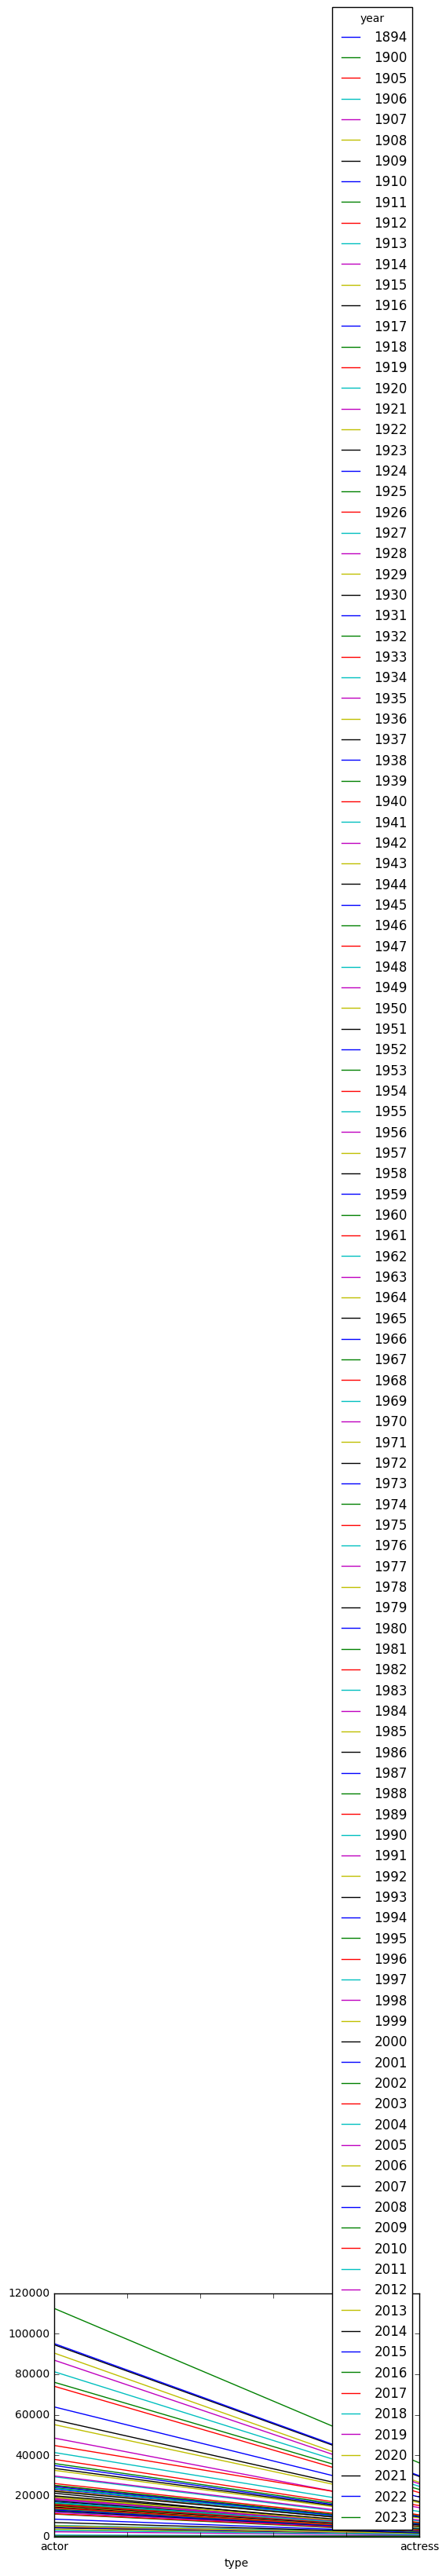

In [25]:
v.plot()

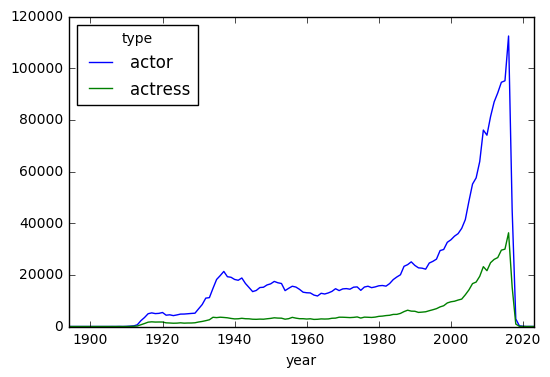

In [26]:
v=g.unstack(1).fillna(0)
v.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

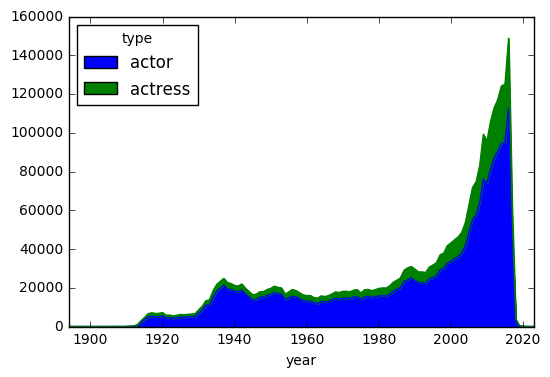

In [27]:
v=g.unstack(1).fillna(0)
v.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [28]:
v=g.unstack(1).fillna(0)
v.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,1.0
1907,5.0,0.0


In [29]:
g1 = v.actor-v.actress
g

year  type   
1894  actor           2
      actress         1
1900  actor           2
1905  actor           1
1906  actor          14
      actress         1
1907  actor           5
1908  actor          29
      actress         9
1909  actor           3
1910  actor          44
      actress        12
1911  actor         136
      actress        38
1912  actor         244
      actress       101
1913  actor         657
      actress       190
1914  actor        2253
      actress       678
1915  actor        3472
      actress      1150
1916  actor        4943
      actress      1677
1917  actor        5275
      actress      1808
1918  actor        4990
      actress      1718
1919  actor        5085
      actress      1741
                  ...  
2009  actor       76036
      actress     23161
2010  actor       74056
      actress     21604
2011  actor       81237
      actress     24698
2012  actor       86939
      actress     25978
2013  actor       90440
      actress     26684
20

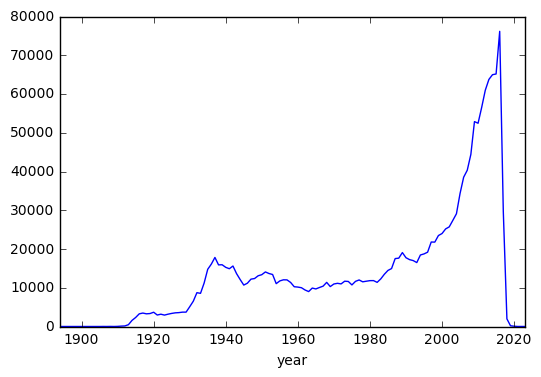

In [31]:
v=g.unstack(1).fillna(0)
g1 = v.actor-v.actress
g1
g1.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.